# Image Processing in Python

## Introduction

Yesterday, we gave a brief overview of Python and three powerful libraries we will be using to develop for DeepCell. Today, we will become more familiar with SciPy and in particular the `scikit-image` library as we review the basics of image processing using Python. <i> NB: scikit-image has a description of tag `skimage` that can be used interchageably with the offical name.</i>

In this tutorial, we will cover:

* Loading & Handling Image Data: Input/output, Data Types, and Colorspaces
* Preprocessing: Contrast Adjustment
* Thresholding
* Filtering, Edge Detection, and Convolutions
* Morphological Operations: Structuring Elements and the Watershed Transform
* Affine Transformations
* Writing Output to Files: Images, JSON, and NPZ

## Loading and Handling Image Data

`skimage` has a number of useful functions we can import to load and manipulate images, as well as save the resulting images. Remember, though, this library builds on NumPy, so we will need to import that library as well.

In [56]:
%matplotlib inline

import numpy as np

from skimage.io import imread, imsave
from skimage.transform import resize as imresize

# Read an JPEG image into a numpy array
#img = imread('resources/img_000000000_Phase_000.png')
img = imread('resources/cat.jpg')
print(img.dtype, img.shape)  # Prints "uint8 (400, 248, 3)"

# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = img * [1, 0.95, 0.9]

# Resize the tinted image to be 300 by 300 pixels.
img_tinted = imresize(img_tinted, (300, 300))

# Write the tinted image back to disk
imsave('resources/cat_tinted.jpg', np.uint8(img_tinted))


uint8 (400, 248, 3)


/home/linus/.virtualenvs/cs155/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/linus/.virtualenvs/cs155/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Rather than "hardcoding" the file path, a more robust way of handling these operations is to designate a section of code to specify the directory path and file name as variables. 

If the file is not in the current working directory, you must also have a way of specifying the path to the directory where the file is stored. In our case, the example images are stored in the directory called 'resources' in the same folder as this notebook. Note that you can use either the full path - something like r"/home/user/bootcamp/intro-to-deepcell/resources/example_cells_1.tif" or the relative path, starting from the current working directory.

NB: Paths and filenames can contain slashes, empty spaces and other special symbols, which can cause trouble for programming languages under certain circumstances. To circumvent such trouble, add the letter r before your string definition to create a so-called 'raw string', which is not affected by these problems (e.g. `my_raw_string = r"some string with funny symbols: \\\!/~***!"`).

In [57]:
# Create a string variable with the name of the file you'd like to load (here: 'example_cells_1.tif').
# Suggested name for the variable: filename
filename = r'img_000000000_Far-red_001.png'

# Create a string variable with the path to the directory that contains the file you'd like to load.
# Suggested name for the variable: dirpath
dirpath = r'resources'  # Relative path
#dirpath = r'/home/user/bootcamp/intro-to-deepcell/resources/img_000000000_Far-red_001.png'  # Absolute path 

In [58]:
# Now combine the directory path and file name into one variable, the file path

# Import the function 'join' from the module 'os.path'
# This function automatically takes care of the slashes that need to be added when combining two paths.
from os.path import join

# Print the result to see that everything is correct
# Suggested name for the variable: filepath
filepath = join(dirpath, filename)
print(filepath)

resources/img_000000000_Far-red_001.png


With the file path established, we can load the image (using the `imread` function we imported earlier), make sure the load was successful, and display the image.

In [59]:
# Load 'img_000000000_Far-red_001.png' and store it in a variable.
# Suggested name for the variable: img
img = imread(filepath)

In [60]:
# Check that the load went as expected

# Check that 'img' is a variable of type 'ndarray' - use Python's built-in function 'type'.
print("Loaded array is of type:", type(img))

# Print the shape of the array using the numpy-function 'shape'. 
print("Loaded array has shape:", img.shape)

# Check the datatype of the individual numbers in the array. You can use the array attribute 'dtype' to do so.
print("Loaded values are of type:", img.dtype)

Loaded array is of type: <class 'numpy.ndarray'>
Loaded array has shape: (1080, 1280)
Loaded values are of type: uint16


NB: The dtype should be 'uint16', because these are unsigned 16-bit integer images. Another common dtype for images is uint8. You can read more about the differences [here](https://www.mathworks.com/help/matlab/creating_plots/working-with-8-bit-and-16-bit-images.html) and [here](https://printaura.com/8-bit-vs-16-bit-images-whats-the-difference-which-to-use/)

Now we're ready to take a look at images. To plot the array as an image, use pyplot's functions `plt.imshow` followed by `plt.show`. 

You can check the documentation for `plt.imshow` and note the parameters that can be specified, such as colormap (cmap)
and interpolation. Since we are working with scientific data, interpolation is unwelcome, so you should set it to "none". The most common cmap for grayscale images is naturally "gray". You may also want to adjust the size of the figure. You can do this by preparing the figure canvas with the function `plt.figure` before calling `plt.imshow`. The canvas size is adjusted using the keyword argument 'figsize' when calling `plt.figure`.

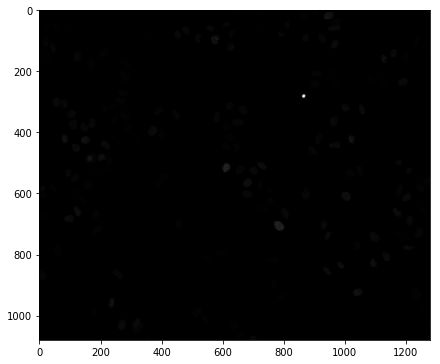

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.imshow(img, interpolation='none', cmap='gray')
plt.show()

Don't worry if it's dark, we'll fix that in a minute. In the meantime, for our peace of mind, here is a side-by-sdie example using our cat image from ealier:

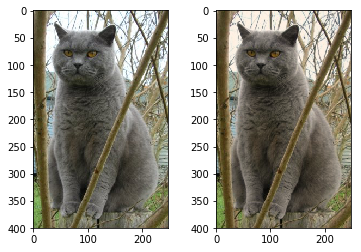

In [62]:
img2 = imread('resources/cat.jpg')
img_tinted2 = img2 * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img2)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results if presented with data that is not uint8. 
# To work around this, we explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted2))
plt.show()

## Preprocessing

Raw microscope images, like the ones we will be using to train our neural nets, often start out looking like garbage. Viz.:
![alt text][phase000]

[phase000]: ./resources/img_000000000_Phase_000.png "A Bunch of Cells?"

Before we can really use this image for anything, we need to improve it. This is the (pre)process of preprocessing.

### Contrast Adjustment

One common preprocessing operation is to tweak the image's contrast.

Within `skimage`, there are multiple functions inside the `skimage.exposure` module that relate to contrast adjustment. We will highlight a few of them here:

* `skimage.exposure.histogram`
* `skimage.exposure.equalize_hist`
* `skimage.exposure.equalize_adapthist`
* `skimage.exposure.rescale_intensity`
* `skimage.exposure.adjust_gamma`


#### `skimage.exposure.histogram`

Let's use `skimage.exposure.histogram` to view the distribution of pixel intensities in cat image.

Note the use of indices on the cat image. It's often most informative to look at each channel in a color image separately, which is what we're doing here.

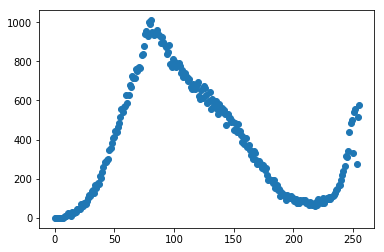

In [63]:
from skimage.exposure import histogram

# compute histogram in Red channel of cat image
(counts, bins) = histogram(img2[:,:,0])
# view histogram
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bins,counts)

Very cool.

Now, let's look at our cell image.

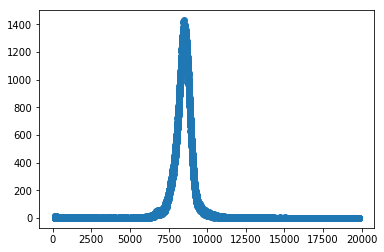

In [66]:
# compute histogram
phase_image = imread("resources/img_000000000_Phase_000.png")
(counts, bins) = histogram(phase_image)
# view histogram
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter( bins, counts)

What...?

Why is this histogram different from the previous one?

#### skimage.exposure.equalize_hist

Let's use `skimage.exposure.equalize_hist` to change the histogram of the phase_image. This function changes the pixel intensity values in the image by spreading them out as evenly as possible across the pixel intensity range while still preserving relative intensities.

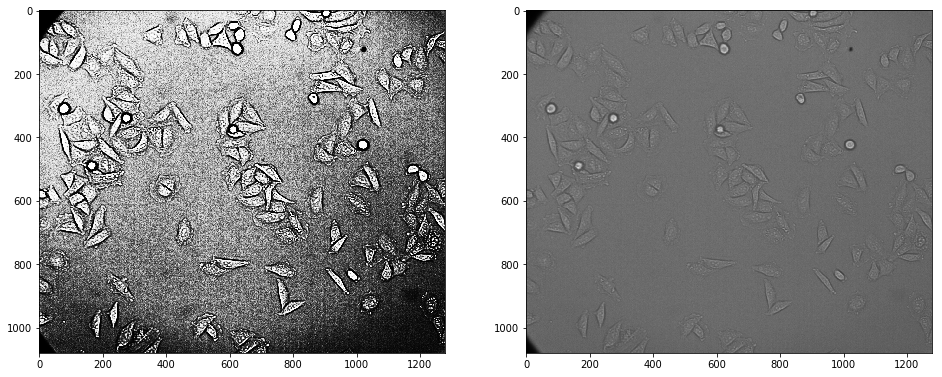

In [162]:
from skimage.exposure import equalize_hist

# compute histogram
equalized_image = equalize_hist(phase_image)

plt.rcParams['figure.figsize'] = [16,8]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(equalized_image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(phase_image, cmap='gray')

If we compare these two images' histograms side by side:

(dtype('float64'), 7.233796296296296e-07, 1.0)

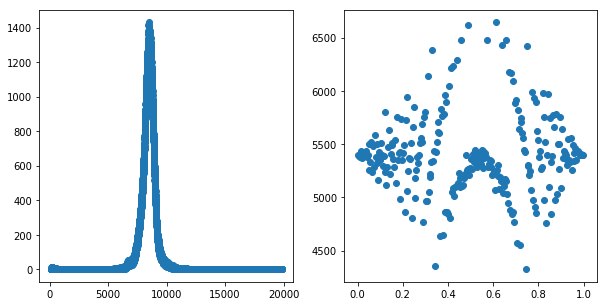

In [161]:
# compute histograms
(counts_phase, bins_phase) = histogram(phase_image)
(counts_equalized, bins_equalized) = histogram(equalized_image)
# view histograms
plt.rcParams['figure.figsize'] = [10,5]
plt.figure()
plt.subplot(1,2,1)
plt.scatter(bins_phase,counts_phase)
plt.subplot(1,2,2)
plt.scatter(bins_equalized,counts_equalized)
(equalized_image.dtype, equalized_image.min(), equalized_image.max())

We see that the distribution of the pixels has been dramatically transformed! Not only have we moved from a uint16 pixel encoding to some sort of float encoding (probably float64), but we've also redistributed our pixels so that they are spread all across the available pixel value range.

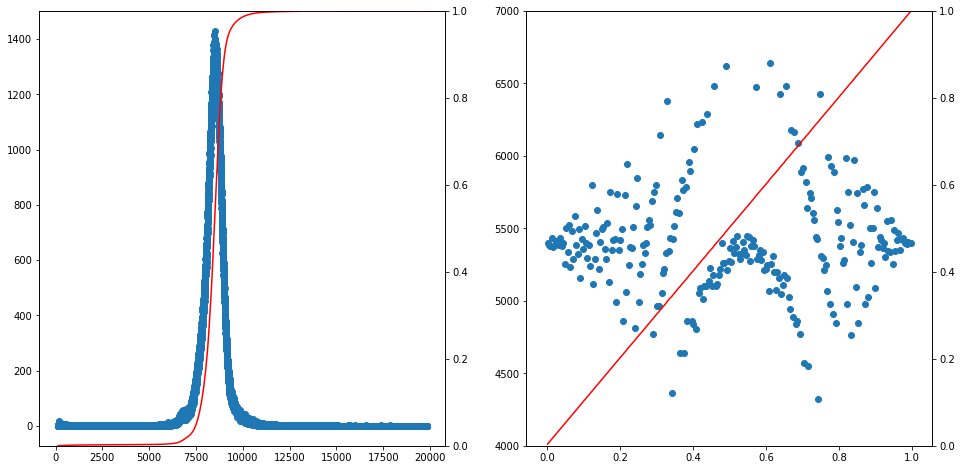

In [160]:
# compute histograms
(counts_phase, bins_phase) = histogram(phase_image)
(counts_equalized, bins_equalized) = histogram(equalized_image)

# compute cumulative distribution functions
img_cdf_phase, bins_phase = exposure.cumulative_distribution(phase_image, 256)
img_cdf_phase = img_cdf_phase
img_cdf_equalized, bins_equalized = exposure.cumulative_distribution(equalized_image, 256)
img_cdf_equalized = img_cdf_equalized

# view histograms
fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(16,8) )

## left plot
right_y_axis_0 = axes[0].twinx()
axes[0].scatter(bins_phase,counts_phase)
#axes[0].plot(bins_phase, img_cdf_phase, 'r')
right_y_axis_0.set_ylim(0,1)
right_y_axis_0.plot(bins_phase, img_cdf_phase, 'r')

## right plot
right_y_axis_1 = axes[1].twinx()
axes[1].scatter(bins_equalized,counts_equalized)
axes[1].set_ylim(4000,7000)
right_y_axis_1.set_ylim(0,1)
right_y_axis_1.plot(bins_equalized, img_cdf_equalized, 'r')

What's more, we've actually transformed the cumulative distribution function (CDF) of pixel values so that hte pixels are now optimally spaced across the entire pixel value range. This maximizes the global contrast of the image, which generally makes things easier to see.

To read more about the math of histogram equalization (which is pleasantly intuitive), visit  
https://en.wikipedia.org/wiki/Histogram_equalization

#### `skimage.exposure.equalize_adapthist`

As an alternative to `skimage.exposure.equalize_hist`, we can use `skimage.exposure.equalize_adapthist`, which performs the same process of spreading pixel intensity values evenly over the available range. However, whereas `skimage.exposure.equalize_hist` does this for the entire image at once, `skimage.exposure.equalize_adapthist` looks at each pixel within the context of a local neighborhood only. (By default, the neighborhoods are 1/8x1/8 of the image. This neighborhood size can be changed by setting the `kernal_size` argument in `skimage.exposure.equalize_adapthist` to the desired pixel value of the neighborhood. Give it a try.)

`skimage.exposure.equalize_adapthist`'s main advantage over `skimage.exposure.equalize_hist` is that `skimage.exposure.equalize_adapthist` can adjust contrast locally, thus potentially giving better definition to a wider range of features from across the image.

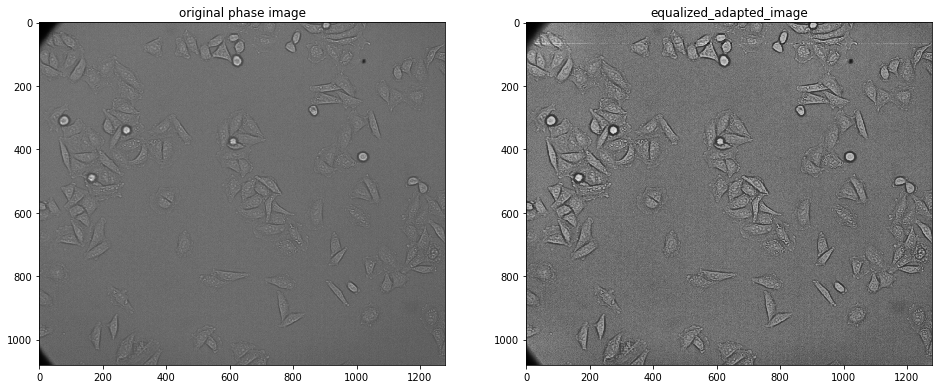

In [169]:
from skimage.exposure import equalize_adapthist

# compute histogram
equalized_adapted_image = equalize_adapthist(phase_image, kernel_size=None)

plt.rcParams['figure.figsize'] = [16,8]
plt.figure()
plt.subplot(1,2,1)
plt.title("original phase image")
plt.imshow(phase_image, cmap='gray')
plt.subplot(1,2,2)
plt.title("equalized_adapted_image")
plt.imshow(equalized_adapted_image, cmap='gray')

Comparing the original histogram with the histogram resulting from `skimage.exposure.equalize_adapthist`:

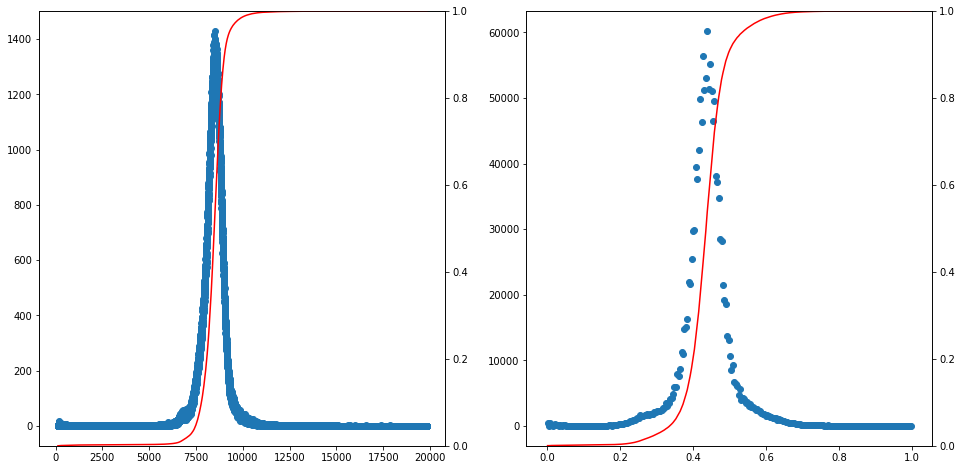

In [165]:
# compute histograms
(counts_phase, bins_phase) = histogram(phase_image)
(counts_equalized, bins_equalized) = histogram(equalized_adapted_image)

# compute cumulative distribution functions
img_cdf_phase, bins_phase = exposure.cumulative_distribution(phase_image, 256)
img_cdf_phase = img_cdf_phase
img_cdf_equalized, bins_equalized = exposure.cumulative_distribution(equalized_adapted_image, 256)
img_cdf_equalized = img_cdf_equalized

# view histograms
fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(16,8) )

## left plot
right_y_axis_0 = axes[0].twinx()
axes[0].scatter(bins_phase,counts_phase)
#axes[0].plot(bins_phase, img_cdf_phase, 'r')
right_y_axis_0.set_ylim(0,1)
right_y_axis_0.plot(bins_phase, img_cdf_phase, 'r')

## right plot
right_y_axis_1 = axes[1].twinx()
axes[1].scatter(bins_equalized,counts_equalized)
#axes[1].set_ylim(4000,7000)
right_y_axis_1.set_ylim(0,1)
right_y_axis_1.plot(bins_equalized, img_cdf_equalized, 'r')

The net result of `skimage.exposure.equalize_adapthist` is to spread out really common pixel values somewhat, thereby increasing contrast among common pixel values, but not dramatically altering many values.

Mathematical details can be found here:
https://en.wikipedia.org/wiki/CLAHE

#### `skimage.exposure.rescale_intensity`

#### `skimage.exposure.adjust_gamma`

## Thresholding

### Manual Thresholding & Threshold Detection

In [215]:
# Create a variable (int) to hold a threshold value, which can be changed later to something more suitable.
thresh = 200

# Recall that relational (Boolean) expressions, such as 'smaller' (<), 'equal' (==) or 'greater or equal' (>=),
# can be used with numpy arrays to directly assign the result to a new variable.
mem = img > thresh

# Check the dtype of your thresholded image - it should be boolean, meaning an array filled with 'True' and 'False',
# where 'True' is the foreground (regions above the threshold) and 'False' is the background.
print(mem.dtype)

bool


Let's take a look at the result. 

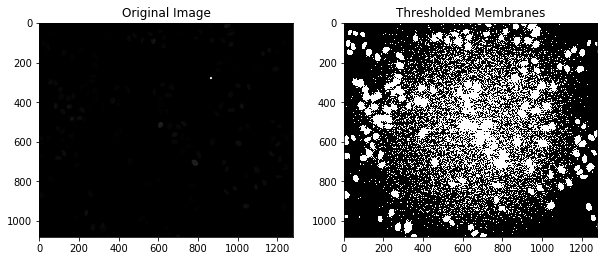

In [216]:
fig, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].imshow(img, interpolation='none', cmap='gray')
ax[1].imshow(mem, interpolation='none', cmap='gray')
ax[0].set_title('Original Image')
ax[1].set_title('Thresholded Membranes')
plt.show()

Now, we can iterate through various threshold values to select something more appropriate. To do so interactively, we will utilize a class of interactive functions called 'widgets.' These are incredibly useful in exploratory data analysis to create simplified 'User Interfaces' (UIs) on the fly.

In [217]:
# Prepare widget
from ipywidgets import interact
@interact(thresh=(100,700,20))
def select_threshold(thresh=200):
    
    # Thresholding
    mem = img > thresh
    
    # Visualization
    plt.figure(figsize=(7,7))
    plt.imshow(mem, interpolation='none', cmap='gray')
    plt.show()

interactive(children=(IntSlider(value=200, description='thresh', max=700, min=100, step=20), Output()), _dom_c…

Let's say we get tired of searching for the perfect threshold by hand (regardless of how cool our widget is). The scikit-image module `skimage.filters.thresholding` provides several threshold detection algorithms. One of the most popular ones 
is [Otsu's method](https://en.wikipedia.org/wiki/Otsu%27s_method). We can import the module and use it to automatically 
determine a threshold for the smoothed image. Then we can apply the threshold and visualize the result.

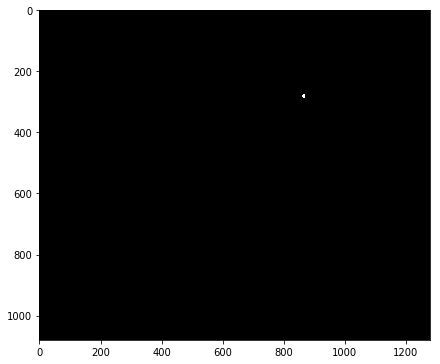

In [218]:
# Import
from skimage.filters.thresholding import threshold_otsu

# Calculate and apply threshold
thresh = threshold_otsu(img)
mem = img > thresh
    
# Visualization
plt.figure(figsize=(7,7))
plt.imshow(mem, interpolation='none', cmap='gray')
plt.show()

Wait, what? Well, as it turns out, Otsu's method works best on smoothed images. Fortunately, scipy can help us there too. We can import the multi-dimensional image processing package from scipy and apply a Guassian filter to smooth the image before re-running Otsu's method. 

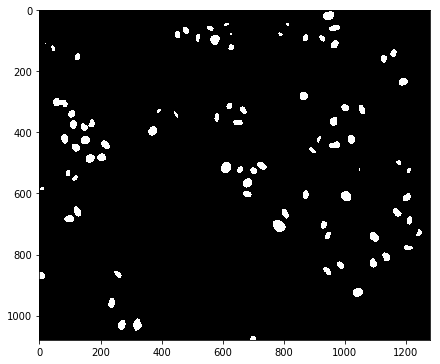

In [231]:
# Import
from skimage.filters.thresholding import threshold_otsu

# Import the image processing package scipy.ndimage as ndi
import scipy.ndimage as ndi

# the gaussian_filter function expects a smoothing factor sigma, so we will arbitrarily define one (this can change later)
sigma = 4
img_smooth = ndi.filters.gaussian_filter(img, sigma)

# Calculate and apply threshold
thresh = threshold_otsu(img_smooth)
Otsu = img_smooth > thresh
    
# Visualization
plt.figure(figsize=(7,7))
plt.imshow(Otsu, interpolation='none', cmap='gray')
plt.show()

This example highlights a few important points: (1) Python (and the packages available for it) are very powerful in their ability to solve difficult problems quickly in very few lines of code; and (2) this can be dangerous - with great power comes great responsibility -> it is up to you to find these modules and understand what sort of data they are expecting.   

## Filtering, Edge Detection, and Convolutions

In [14]:
#Dylan Code Here


## Morphological Operations

### Structuring Elements and Adaptive Thresholding

In our earlier section on thresholding, we quickly discovered the limitations of naive thresholding by a fixed value accross an entire image. Adaptive thresholding methods improve on this approach by varying the threshold for certain parts of the image.  

One way of accomplishing this is known as adpative background subtraction. In this approach, we use a strong "mean filter" with a circular [structuring element](https://en.wikipedia.org/wiki/Structuring_element) to create the background image. Then, we use this background image for thresholding. 

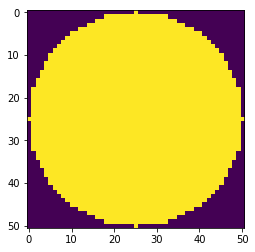

In [232]:
# Create a circular structuring element (SE) whose size depends on i
i = 51
SE = (np.mgrid[:i,:i][0] - np.floor(i/2))**2 + (np.mgrid[:i,:i][1] - np.floor(i/2))**2 <= np.floor(i/2)**2

# Visualize the result
plt.imshow(SE, interpolation='none')
plt.show()

In [233]:
# Create the background by running a mean filter over the image using the disc SE and assign the output to a new variable
# Use the function 'skimage.filters.rank.mean'
from skimage.filters import rank 
#bg = rank.mean(~np.uint8(img_smooth), selem=SE)
bg = rank.mean(img_smooth, selem=SE)

/home/emoen/anaconda3/lib/python3.6/site-packages/skimage/filters/rank/generic.py:102: UserWarning: Bitdepth of 14 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


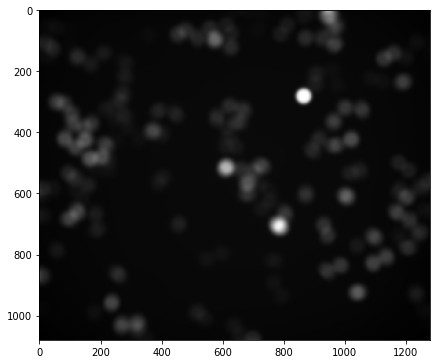

In [234]:
# Visualize the resulting background image. 
plt.figure(figsize=(7,7))
plt.imshow(bg, interpolation='none', cmap='gray')
plt.show()

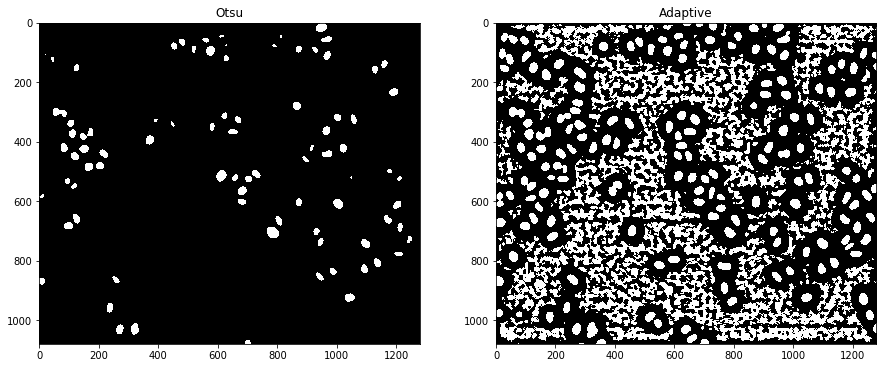

In [235]:
# Threshold the Gaussian-smoothed original image against the background image using a relational expression
mem = img_smooth > bg

# Visualize the result against Otsu
fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(Otsu, interpolation='none', cmap='gray')
ax[1].imshow(mem, interpolation='none', cmap='gray')
ax[0].set_title('Otsu')
ax[1].set_title('Adaptive')
plt.show()

### Improving Masks with Binary Morphology

While it is an improvment on our original results, our latest segmentation still leaves something to be desired. Let's see if we can improve the membrane segmentation with morphological operations. 

There are a number of operations available in the `ndimage` module that may be of use here (`ndi.binary_closing` or `ndi.binary_fill_holes` for example). Feel free to explore and see how the different functions affect the mask. Can you optimize the mask, for example by closing gaps?

Also, note that the default SE for these functions is a square. Try to create another disc-shaped SE and see how that changes the outcome.

In our first attempt, we are going to attempt to get rid of these speckles using binary hole filling. The documentation makes it clear that, for `ndi.binary_fill_holes` to work as intended, we need to invert the mask. The function `np.logical_not` or the corresponding operator '~' will help us here.

In [204]:
#mem_holefilled = np.logical_not(ndi.binary_fill_holes(np.logical_not(mem)))  # Long form
mem_holefilled = ndi.binary_fill_holes(mem)  # Short form

In [205]:
# New circular SE of appropriate size 
i = 17
SE = (np.mgrid[:i,:i][0] - np.floor(i/2))**2 + (np.mgrid[:i,:i][1] - np.floor(i/2))**2 <= np.floor(i/2)**2

# Sometimes, SE can introduce boundary artifact issues that can be solved with 'padding.' 'Padding' refers to the 
# extension of the image at the boundaries, in this case using a 'reflection' of the pixel values next to the boundary. 
# If morphological operations are done on the padded image, the boundary artifacts will occur in the padded region
# outside the original image, which can simply be cropped out again at the end.
pad_size = i+1
mem_padded = np.pad(mem_holefilled, pad_size, mode='reflect')

# Binary closing works well to round off the membranes and close gaps
mem_final = ndi.binary_closing(mem_padded, structure=SE)

# This slicing operation crops the padded image back to the original size
mem_final = mem_final[pad_size:-pad_size, pad_size:-pad_size]

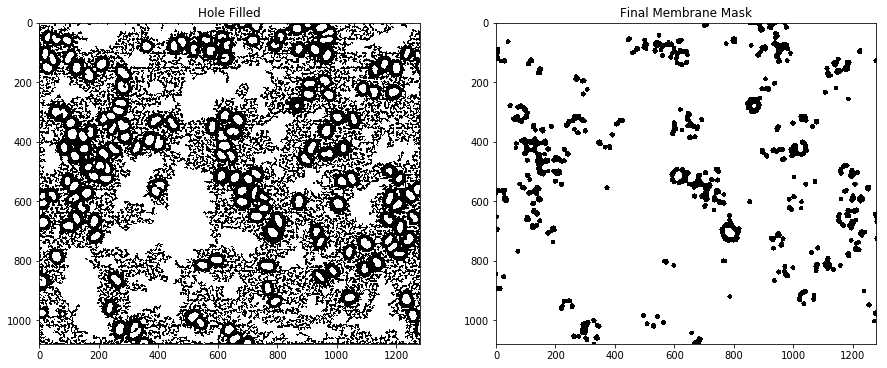

In [206]:
# Visualize the final result
fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(mem_holefilled, interpolation='none', cmap='gray')
ax[1].imshow(mem_final, interpolation='none', cmap='gray')
ax[0].set_title('Hole Filled')
ax[1].set_title('Final Membrane Mask')
plt.show()

### The Watershed Transform

## Affine Transformations

## Writing Output to Files

### Images

### NPZ

### JSON